In [1]:
!ls ~/evals/eval_5refs_MORETYPES

args.pickle
astera-dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt.dragon-ryder
binary_paths.csv
debug_vars.csv
dragon_aligned.csv
dragon_predictions.csv
ryder_aligned.csv


In [17]:
import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

from pathlib import Path

from datatype_recovery.eval_dataset import PandasEvalMetrics

# df = pd.read_csv(Path.home()/'evals/eval_5refs_MORETYPES/astera-dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt.dragon-ryder/predictions.csv')
# df = pd.read_csv(Path.home()/'evals/eval_5refs_MORETYPES/ryder_aligned.csv')
# df = pd.read_csv(Path.home()/'evals/test_eval_MORETYPES/ryder_aligned.csv')
df = pd.read_csv(Path.home()/'evals/astera_conf/dragon_aligned.csv')
df

,BinaryId,FunctionStart,Signature,Vartype,NameStrip,LocationStrip,Pred,PredJson,NumRefs,NumOtherVars,Influence,Confidence,NameDebug,LocationDebug,Type,TypeJson,TypeSeq,PredSeq
0,6,1089216,17,l,auStack_8,Stack[-0x8],void,"{""kind"": ""Builti...",1,3,1,0.041535,auStack_8,Stack[-0x8],uchar[8],"{""kind"": ""ArrayT...","ARR,uchar",void
1,6,1089449,"16,28,52,76,101,...",l,local_c,Stack[-0xc],int32,"{""kind"": ""Builti...",7,3,7,0.999967,i,Stack[-0xc],int32,"{""kind"": ""Builti...",int32,int32
2,6,1089449,42,p,param_2,LocType=register...,uint32*,"{""kind"": ""Pointe...",1,1,2,0.095840,a,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,uint32"
3,6,1089449,66,p,param_3,LocType=register...,uint32*,"{""kind"": ""Pointe...",1,1,2,0.095821,b,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,uint32"
4,6,1089449,90,p,param_1,LocType=register...,uint32*,"{""kind"": ""Pointe...",1,1,2,0.095816,r,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,uint32"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,6,1765287,"73,126,162,174,1...",l,local_5038,Stack[-0x5038],int64,"{""kind"": ""Builti...",10,8,10,0.903421,offset,Stack[-0x5038],int64,"{""kind"": ""Builti...",int64,int64
7174,6,1765816,"34,39,79,84",l,piVar1,LocType=register...,int32*,"{""kind"": ""Pointe...",4,0,4,0.999634,piVar2,LocType=register...,int32*,"{""kind"": ""Pointe...","PTR,int32","PTR,int32"
7175,6,1765816,"49,98,107,205,25...",p,param_1,LocType=register...,STRUCT*,"{""kind"": ""Pointe...",6,2,15,0.085031,js,LocType=register...,_GLFWjoystick*,"{""kind"": ""Pointe...","PTR,STRUCT","PTR,STRUCT"
7176,6,1765816,"69,74",l,sVar2,LocType=register...,int64,"{""kind"": ""Builti...",2,1,2,0.997098,sVar3,LocType=register...,int64,"{""kind"": ""Builti...",int64,int64


In [18]:
# df.apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')
PandasEvalMetrics(df, 'TypeSeq','PredSeq').accuracy

0.6774867651156311

In [39]:
PandasEvalMetrics(df[df.Confidence>0.2], 'TypeSeq','PredSeq').accuracy

0.8790748898678414

In [5]:
PandasEvalMetrics(df[df.Confidence<=0.9], 'TypeSeq','PredSeq').accuracy

0.564343163538874

In [6]:
len(df[df.Confidence>0.9])/len(df)*100

27.249930342713846

(0.0, 20.0)

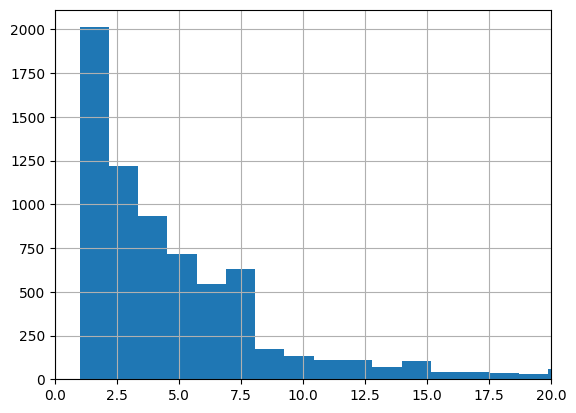

In [51]:
#len(df[df.Influence<10])/len(df)
df.Influence.hist(bins=300).set_xlim(0, 20)

In [7]:
df.Influence.mean()

5.921426581220396

In [61]:
print(df[df.Confidence>0.75].NumRefs.mean())
df[df.Confidence<=0.75].NumRefs.mean()

6.463586530931871


4.445717993079585

In [105]:
pd.DataFrame(df.groupby('TypeSeq').pipe(lambda gb: [
        (
            x[0],
            x[1].Confidence.mean(),
            PandasEvalMetrics(x[1], 'TypeSeq','PredSeq').accuracy,
            len(x[1])
        ) for x in gb]
    ), columns=['TypeSeq','AvgConfidence','Accuracy','Count']
).sort_values(by='Count', ascending=False)
#.sort_values(by='Accuracy', ascending=False)
#.sort_values(by='AvgConfidence', ascending=False)



,TypeSeq,AvgConfidence,Accuracy,Count
49,int32,0.630631,0.848898,1906
31,"PTR,STRUCT",0.394914,0.818182,1551
48,float,0.804912,0.781122,731
53,uint32,0.523668,0.580321,498
35,"PTR,float",0.268353,0.254545,385
33,"PTR,char",0.453346,0.532609,276
36,"PTR,int32",0.250707,0.329218,243
52,uchar,0.542042,0.573222,239
39,"PTR,uchar",0.219842,0.400000,200
54,uint64,0.307279,0.456410,195


In [68]:
df[df.Confidence>0.75].groupby('TypeSeq').count()['BinaryId'].sort_values(ascending=False)

TypeSeq
int32             970
float             572
PTR,STRUCT        311
uint32            180
PTR,char           95
uchar              93
ushort             75
double             57
PTR,float          56
uint64             35
ARR,uchar          26
int64              12
char               11
PTR,uchar          10
short              10
PTR,int32           9
PTR,void            9
STRUCT              8
PTR,FUNC            3
PTR,UNION           2
PTR,PTR,char        2
ARR,float           2
ENUM                2
ARR,char            1
PTR,PTR,ushort      1
PTR,ARR,float       1
PTR,int64           1
Name: BinaryId, dtype: int64

In [69]:
df[df.Confidence<=0.75].groupby('TypeSeq').count()['BinaryId'].sort_values(ascending=False)

TypeSeq
PTR,STRUCT           1240
int32                 936
PTR,float             329
uint32                318
PTR,int32             234
PTR,uchar             190
PTR,char              181
uint64                160
float                 159
uchar                 146
PTR,void               72
ushort                 71
short                  62
int64                  57
STRUCT                 48
ARR,float              46
PTR,FUNC               46
char                   36
PTR,uint32             28
PTR,short              26
PTR,PTR,char           24
PTR,ushort             24
double                 23
PTR,double             18
PTR,PTR,STRUCT         16
ARR,uchar              15
PTR,uint64             15
PTR,PTR,float          13
ENUM                   12
ARR,char               11
PTR,ARR,float           9
ARR,int32               8
PTR,UNION               6
ARR,PTR,char            5
ARR,int64               4
UNION                   4
PTR,PTR,void            4
ARR,STRUCT              4
PTR,

In [58]:
df.groupby('Vartype').count()/len(df)

,BinaryId,FunctionStart,Signature,NameStrip,LocationStrip,Pred,PredJson,NumRefs,NumOtherVars,Influence,Confidence,NameDebug,LocationDebug,Type,TypeJson,TypeSeq,PredSeq
Vartype,,,,,,,,,,,,,,,,,
l,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098,0.541098
p,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902,0.458902


In [57]:
df[df.Confidence>0.75].groupby('Vartype').count()/len(df[df.Confidence>0.75])

,BinaryId,FunctionStart,Signature,NameStrip,LocationStrip,Pred,PredJson,NumRefs,NumOtherVars,Influence,Confidence,NameDebug,LocationDebug,Type,TypeJson,TypeSeq,PredSeq
Vartype,,,,,,,,,,,,,,,,,
l,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538,0.669538
p,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462,0.330462


<Axes: xlabel='ConfidenceThreshold'>

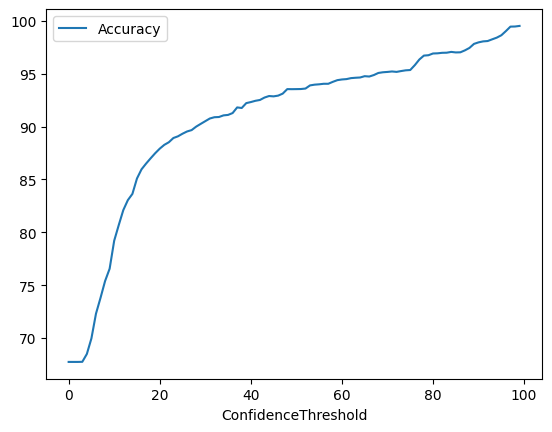

In [8]:
df_by_threshold = {pcnt: df[df.Confidence>(pcnt/100)] for pcnt in range(0, 100, 1)}

pd.DataFrame([(
        pcnt,
        len(ddf)/len(df)*100,
        ddf.Influence.mean(),
        PandasEvalMetrics(ddf, 'TypeSeq','PredSeq').accuracy*100
    ) for pcnt, ddf in df_by_threshold.items()],
    columns=['ConfidenceThreshold', 'VarsAboveThreshold', 'AvgInfluence', 'Accuracy']
).plot(x='ConfidenceThreshold', y='Accuracy', rot=0)

# thresh_df = pd.DataFrame(
#     [(
#         pcnt,
#         len(df[df.Confidence>(pcnt/100)])/len(df)*100,
#         df[df.Confidence>(pcnt/100)].Influence.mean(),
#         PandasEvalMetrics(df[df.Confidence>(pcnt/100)], 'TypeSeq','PredSeq').accuracy*100
#     ) ,
#     columns=['Confidence Threshold', 'VarsAboveThreshold', 'AvgInfluence', 'Accuracy']
# )
# thresh_df

(0.0, 100.0)

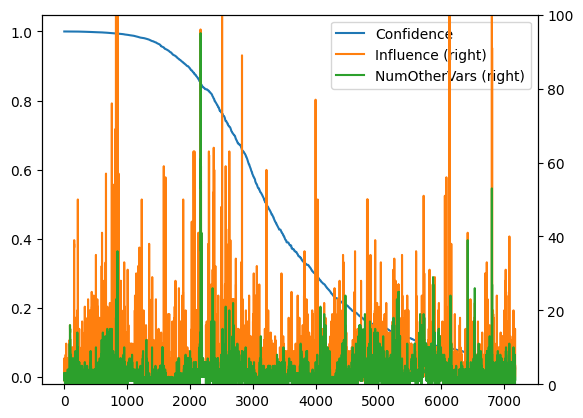

In [32]:
ax = df[['Confidence']].sort_values(by='Confidence',ascending=False).reset_index(drop=True).plot()
df[['Influence']].plot(ax=ax, secondary_y=True)
ax2 = df[['NumOtherVars']].plot(ax=ax, secondary_y=True)
ax2.set_ylim(0, 100)

In [10]:
# df_by_threshold = {pcnt: df[df.Confidence>(pcnt/100)] for pcnt in range(0, 100, 1)}

df_by_inf_by_conf = {
    inf: {
        conf: df[(df.Confidence>=(3/100))&(df.Influence>=(inf/100))] for conf in range(50, 100, 10)
    }
    for inf in range(0, 100, 5)
}

# (inf_th, len(df[(df.Confidence>(conf_th/100))&(df.Influence>inf_th)])/len(df)*100)
pd.DataFrame([(
    i,
    *[len(gdf)/len(df)*100 for i, gdf in cdict.items()]
    ) for i, cdict in df_by_inf_by_conf.items()
    ],
    # columns=['Influence',]
    # columns=['Confidence','Influence','AboveThresholds','Accuracy']
)

# PandasEvalMetrics(gdf, 'TypeSeq','PredSeq').accuracy*100

#.pivot(columns=['Confidence'])
#.plot(x='Influence', y='AboveThresholds')

# for i, gdf in cdict.items()

,0,1,2,3,4,5
0,0,99.986069,99.986069,99.986069,99.986069,99.986069
1,5,99.986069,99.986069,99.986069,99.986069,99.986069
2,10,99.986069,99.986069,99.986069,99.986069,99.986069
3,15,99.986069,99.986069,99.986069,99.986069,99.986069
4,20,99.986069,99.986069,99.986069,99.986069,99.986069
5,25,99.986069,99.986069,99.986069,99.986069,99.986069
6,30,99.986069,99.986069,99.986069,99.986069,99.986069
7,35,99.986069,99.986069,99.986069,99.986069,99.986069
8,40,99.986069,99.986069,99.986069,99.986069,99.986069
9,45,99.986069,99.986069,99.986069,99.986069,99.986069


In [11]:
xdf = pd.DataFrame([(
            inf,
            conf,
            df.loc[(df.Confidence>(conf/100))&(df.Influence>inf),:]
        ) for inf in range(0,100,5)
        for conf in range(50,100,10)
    ],
    columns=['Influence','Confidence','DF']
)
xdf#.iloc[0].DF
xdf.groupby('Confidence').apply(lambda x: x.DF)#.apply(lambda x: x)
# xdf.groupby('Influence').apply(lambda x: [(x.Confidence, len(z)) for z in x.DF])
# xdf['AboveThresholds'] = xdf.DF.apply(lambda x: len(x)/len(df))

# xdf[xdf.Confidence==50].plot(x='Influence',y='AboveThresholds')
# xdf.groupby(['Confidence','Influence']).plot()#x='Influence',y='AboveThresholds')

Confidence    
50          0           BinaryId  ...
            5           BinaryId  ...
            10          BinaryId  ...
            15          BinaryId  ...
            20          BinaryId  ...
                         ...         
90          79          BinaryId  ...
            84          BinaryId  ...
            89          BinaryId  ...
            94          BinaryId  ...
            99          BinaryId  ...
Name: DF, Length: 100, dtype: object

,InfluenceThreshold,Conf50,Acc_Conf50,Conf60,Acc_Conf60,Conf70,Acc_Conf70,Conf80,Acc_Conf80,Conf90,Acc_Conf90
0,0,44.831429,93.536358,41.404291,94.448183,37.712455,95.160694,33.296183,96.903766,27.249930,97.955010
1,5,18.668153,96.119403,17.219281,97.411003,15.909724,98.161121,14.474784,98.556304,12.398997,98.988764
2,10,6.701031,95.841996,6.143773,96.598639,5.516857,97.222222,4.820284,97.976879,4.151574,97.986577
3,15,3.413207,95.510204,3.134578,96.000000,2.772360,96.482412,2.354416,97.633136,1.964335,97.872340
4,20,1.978267,95.070423,1.825021,95.419847,1.588186,95.614035,1.337420,96.875000,1.142379,97.560976
5,25,1.309557,94.680851,1.225968,94.318182,1.044859,94.666667,0.877682,95.238095,0.780162,96.428571
6,30,0.947339,94.117647,0.863750,93.548387,0.724436,92.307692,0.640847,93.478261,0.599053,95.348837
7,35,0.668710,93.750000,0.599053,93.023256,0.501532,91.666667,0.431875,93.548387,0.404012,93.103448
8,40,0.501532,94.444444,0.445807,93.750000,0.376149,92.592593,0.320424,95.652174,0.306492,95.454545
9,45,0.417944,96.666667,0.376149,96.296296,0.306492,95.454545,0.264698,100.000000,0.264698,100.000000


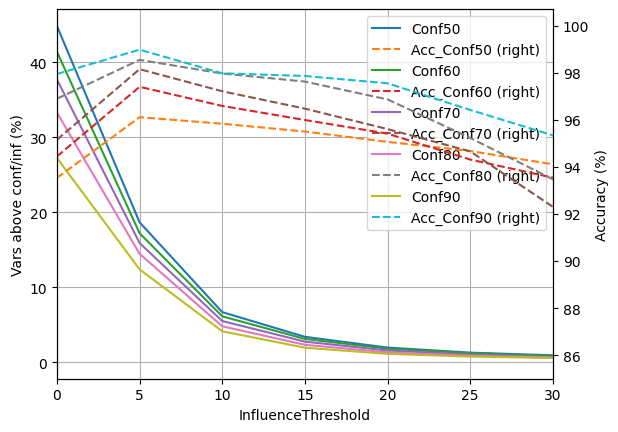

In [14]:
from matplotlib import pyplot as plt

conf_ranges = list(range(50, 100, 10))

by_conf = [pd.DataFrame([(
    inf_th,
    len(df[(df.Confidence>(conf_th/100))&(df.Influence>inf_th)])/len(df)*100,
    PandasEvalMetrics(df[(df.Confidence>(conf_th/100))&(df.Influence>inf_th)], 'TypeSeq','PredSeq').accuracy*100
    ) for inf_th in range(0, 100, 5)],
    columns=['InfluenceThreshold',f'Conf{conf_th}',f'Acc_Conf{conf_th}'])
for conf_th in conf_ranges]

mdf = pd.merge(by_conf[0], by_conf[1], on='InfluenceThreshold', how='left')

for x in by_conf[2:]:
    mdf = mdf.merge(x, on='InfluenceThreshold', how='left')

ax = None
for conf in conf_ranges:
    ax = mdf.plot(x='InfluenceThreshold', y=f'Conf{conf}',
            logx=False, ylabel='Vars above conf/inf (%)',
            xlim=(0, 30),
            grid=True,
            ax=ax)

    mdf.plot(x='InfluenceThreshold',
            y=f'Acc_Conf{conf}', ax=ax,
            style='--',
            #grid=True,
            ylabel='Accuracy (%)',
            secondary_y=True)

mdf

    #     columns=['InfluenceThreshold','HighConf/HighInf']
    # ).plot(x='InfluenceThreshold', fig=fig)

In [30]:
ax.get_lines()[-1].get_color()

'#bcbd22'

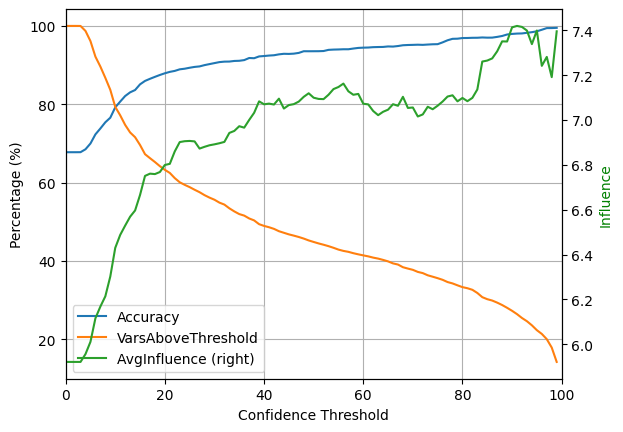

In [80]:

thresh_df = pd.DataFrame(
    [(
        pcnt,
        len(df[df.Confidence>(pcnt/100)])/len(df)*100,
        df[df.Confidence>(pcnt/100)].Influence.mean(),
        PandasEvalMetrics(df[df.Confidence>(pcnt/100)], 'TypeSeq','PredSeq').accuracy*100
    ) for pcnt in range(0, 100, 1)],
    columns=['Confidence Threshold', 'VarsAboveThreshold', 'AvgInfluence', 'Accuracy']
)
ax = thresh_df.plot(x='Confidence Threshold',y=['Accuracy','VarsAboveThreshold'], grid=True, ylabel='Percentage (%)')
ax2 = thresh_df.plot(ax=ax, x='Confidence Threshold', y='AvgInfluence', secondary_y=True, ylabel='Influence')
ax.set_xlim(0, 100)

ax2.yaxis.label.set_color('green')
ax.set

0.5

In [19]:
PandasEvalMetrics(df[df.Confidence<0.4], 'TypeSeq','PredSeq').accuracy

0.5128205128205128

(0.0, 5.0)

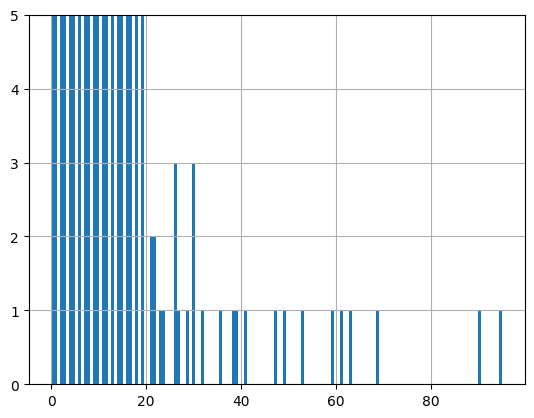

In [3]:
ax = df.NumOtherVars.hist(bins=150)
ax.set_ylim((0,5))
# dir(ax)

In [4]:
len(df[df.NumOtherVars<20])/len(df)

0.9961585951433667

<Axes: xlabel='NumOtherVars'>

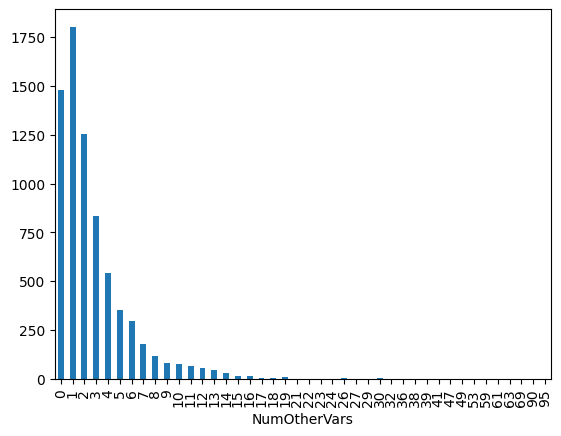

In [5]:
df.groupby('NumOtherVars').count()['BinaryId'].plot(kind='bar')

<Axes: xlabel='Influence'>

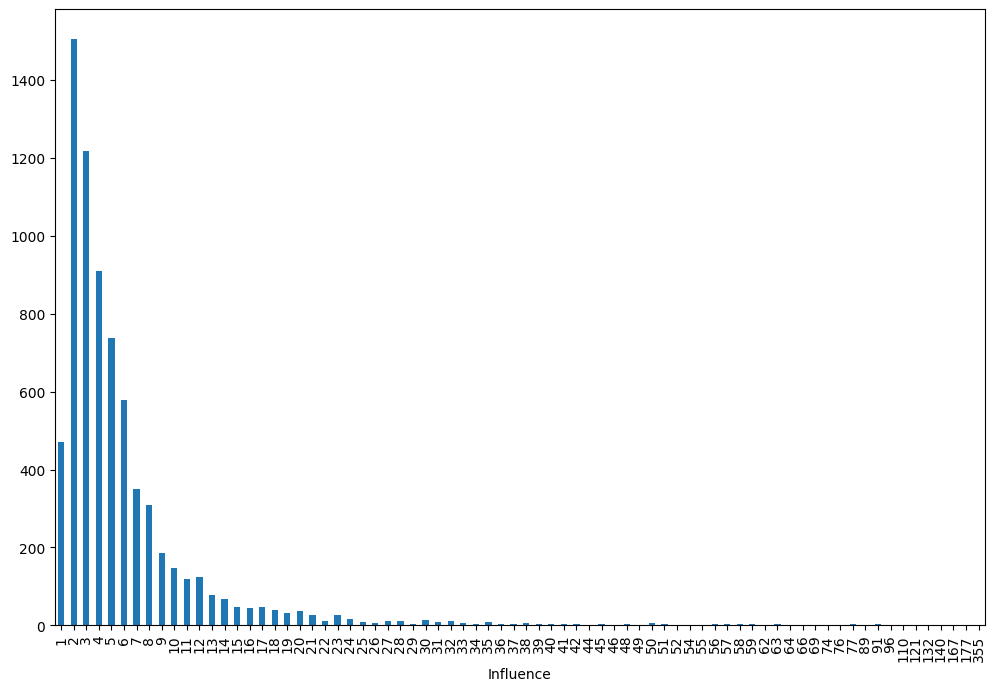

In [6]:
df.groupby('Influence').count()['BinaryId'].plot(kind='bar', figsize=(12,8))#, ylim=(0,5))

In [14]:
df['InfluenceN'] = df.Influence/df.Influence.max()
df['NumRefsN'] = df.NumRefs/df.NumRefs.max()
df['NumOtherVarsN'] = df.NumOtherVars/df.NumOtherVars.max()

<Axes: >

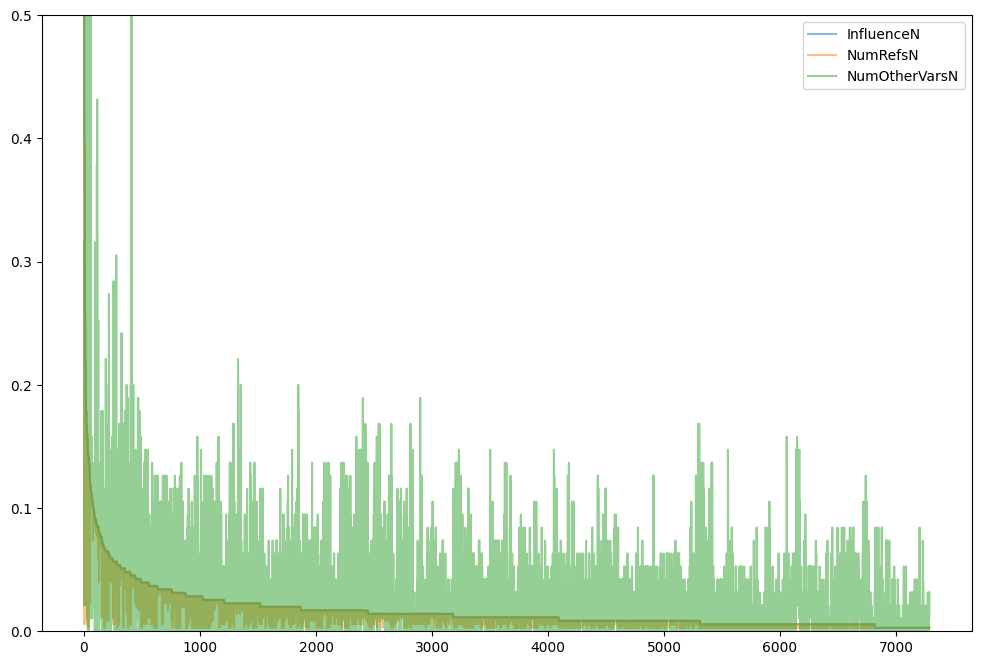

In [15]:
df[['InfluenceN','NumRefsN','NumOtherVarsN']].sort_values(by='InfluenceN', ascending=False).reset_index(drop=True).plot(
    figsize=(12,8), alpha=0.5, ylim=(0,0.5)
)
#.loc[:100,'Influence'].plot(kind='bar')
#.loc[:10,'Influence']#.plot(kind='bar')

<Axes: xlabel='NumOtherVars'>

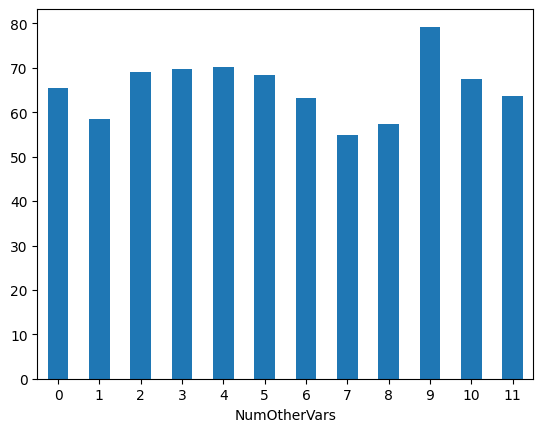

In [16]:
# df.groupby('Gen').apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')
df[df.NumOtherVars<12].groupby('NumOtherVars').apply(lambda df: PandasEvalMetrics(df,'TypeSeq','PredSeq').accuracy*100).plot(
    rot=0, kind='bar'
)

In [17]:
# df.columns
# TODO: - what is the accuracy of Gen1 vs. Gen2?????

df.groupby('Gen').pipe(lambda gb: [
    (PandasEvalMetrics(x[1], truth_col='TypeSeq', pred_col='PredSeq').accuracy, x[0]) for x in gb
])

[(0.7876354877559213, 1), (0.5817007086285952, 2)]

<Axes: xlabel='Gen', ylabel='Accuracy'>

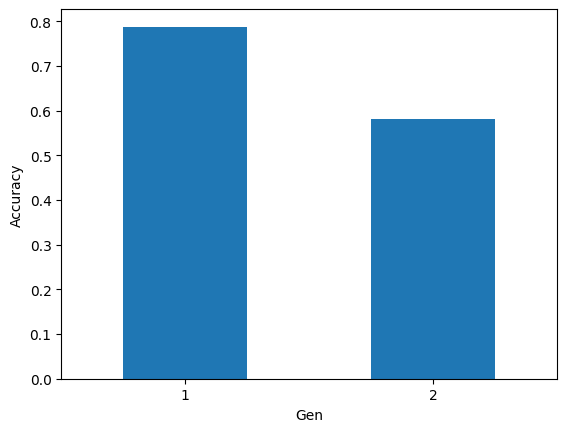

In [25]:
df.groupby('Gen').apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')

<Axes: xlabel='Gen', ylabel='# Variables'>

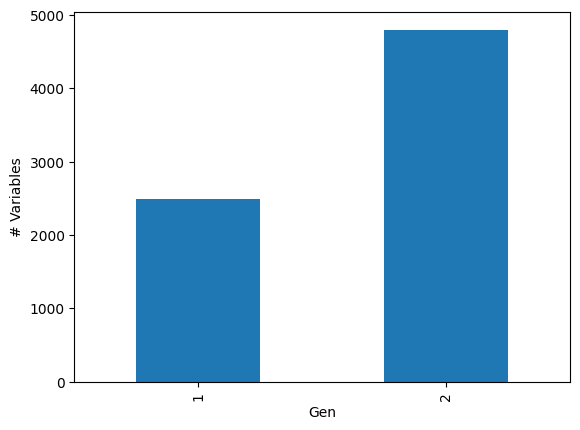

In [29]:
df.groupby('Gen').count()['BinaryId'].plot(kind='bar',ylabel='# Variables')

In [41]:
df.groupby('Gen').apply(lambda df: (df.Retyped.sum(), df.Retyped.sum()/len(df)*100))

Gen
1    (2465, 98.956242...
2    (4673, 97.394747...
dtype: object